In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [243]:
df = pd.read_csv("/content/drive/MyDrive/global firepower 2022 wide.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   country                    140 non-null    object
 1   country_code               140 non-null    object
 2   Active Personnel           140 non-null    int64 
 3   Aircraft Carriers          140 non-null    int64 
 4   Armored Vehicles           140 non-null    int64 
 5   Attack Helicopters         140 non-null    int64 
 6   Available Manpower         140 non-null    int64 
 7   Coastline Coverage         140 non-null    int64 
 8   Corvettes                  140 non-null    int64 
 9   Dedicated Attack           140 non-null    int64 
 10  Defense Budget             140 non-null    int64 
 11  Destroyers                 140 non-null    int64 
 12  External Debt              140 non-null    int64 
 13  Fighters/Interceptors      140 non-null    int64 
 14  Fit-for-Se

##Data Preprocessing and Exploratory Data Analysis

In [244]:
df.isnull().sum()

country                      0
country_code                 0
Active Personnel             0
Aircraft Carriers            0
Armored Vehicles             0
Attack Helicopters           0
Available Manpower           0
Coastline Coverage           0
Corvettes                    0
Dedicated Attack             0
Defense Budget               0
Destroyers                   0
External Debt                0
Fighters/Interceptors        0
Fit-for-Service              0
Foreign Exchange/Gold        0
Frigates                     0
Helicopter Carriers          0
Helicopters                  0
Labor Force                  0
Merchant Marine Fleet        0
Mine Warfare                 0
Navy Ships                   0
Oil Consumption              0
Oil Production               0
Oil Proven Reserves          0
Paramilitary                 0
Patrol Vessels               0
Ports / Trade Terminals      0
Purchasing Power Parity      0
Railway Coverage             0
Reaching Mil Age Annually    0
Reserve 

In [245]:
#Taking first 15 and last 15 countries in list of countries (alphabetical)
first_df = df.iloc[:15,:]
second_df = df.iloc[-15:,:]

In [246]:
new_df = pd.concat([first_df, second_df]).reset_index()
new_df = new_df.drop(columns = ["country", "country_code"])
new_df

,index,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,Dedicated Attack,Defense Budget,...,Square Land Area,Submarines,Tanker Fleet,Tanks,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable)
0,0,0,0,530,0,14611901,0,0,0,99050000,...,652230,0,0,0,0,37466414,60,0,0,1200
1,1,8000,0,76,0,1513309,362,0,0,192400000,...,28748,0,0,0,19,3088385,0,0,0,41
2,2,130000,0,6461,45,20916812,998,6,22,9700000000,...,2381741,6,5,2196,552,43576691,450,87,58,0
3,3,107000,0,1210,15,6728529,1600,0,18,1059270000,...,1246700,0,0,320,299,33642646,585,61,30,1300
4,4,83000,0,800,0,20180574,4989,9,6,3064800000,...,2780400,2,2,349,218,45864941,172,70,22,11000
5,5,45000,0,673,20,1686501,0,0,10,632500000,...,29743,0,0,288,64,3011609,145,10,2,0
6,6,59000,0,1765,22,10840189,25760,0,37,44618000000,...,7741220,6,6,59,430,25809973,54,113,38,2000
7,7,23000,0,542,0,3998189,0,0,0,3432000000,...,83871,0,0,56,102,8884864,0,13,11,0
8,8,65000,0,1762,17,5038319,713,0,11,1700000000,...,86600,4,0,510,149,10282283,319,32,2,0
9,9,10000,0,833,22,824542,161,2,0,1538800000,...,760,0,0,180,110,1526929,26,37,3,0


In [247]:
#Adding the indices data (which will become the dependent variable)
data = [3.3736, 3.0023, 0.4724, 1.0931, 0.6091, 2.3169, 0.2377, 0.8924, 1.0251, 2.3269, 0.6851, 
0.8124, 1.1451, 35.8958, 1.5708, 1.3664, 0.1961, 1.6728, 2.2436, 0.3266, 0.5859, 0.1382, 0.0453, 
2.4526, 0.8272, 0.6664, 0.4521, 1.4754, 2.1966, 2.2498]

In [248]:
indices = pd.DataFrame(data)

In [249]:
final_df = pd.concat([new_df, indices], axis = 1).drop(columns = ["index"])
final_df.rename(columns = {'0 ':'power index'}, inplace = True)


In [250]:
final_df

,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,Dedicated Attack,Defense Budget,Destroyers,...,Submarines,Tanker Fleet,Tanks,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable),0
0,0,0,530,0,14611901,0,0,0,99050000,0,...,0,0,0,0,37466414,60,0,0,1200,3.3736
1,8000,0,76,0,1513309,362,0,0,192400000,0,...,0,0,0,19,3088385,0,0,0,41,3.0023
2,130000,0,6461,45,20916812,998,6,22,9700000000,0,...,6,5,2196,552,43576691,450,87,58,0,0.4724
3,107000,0,1210,15,6728529,1600,0,18,1059270000,0,...,0,0,320,299,33642646,585,61,30,1300,1.0931
4,83000,0,800,0,20180574,4989,9,6,3064800000,4,...,2,2,349,218,45864941,172,70,22,11000,0.6091
5,45000,0,673,20,1686501,0,0,10,632500000,0,...,0,0,288,64,3011609,145,10,2,0,2.3169
6,59000,0,1765,22,10840189,25760,0,37,44618000000,3,...,6,6,59,430,25809973,54,113,38,2000,0.2377
7,23000,0,542,0,3998189,0,0,0,3432000000,0,...,0,0,56,102,8884864,0,13,11,0,0.8924
8,65000,0,1762,17,5038319,713,0,11,1700000000,0,...,4,0,510,149,10282283,319,32,2,0,1.0251
9,10000,0,833,22,824542,161,2,0,1538800000,0,...,0,0,180,110,1526929,26,37,3,0,2.3269


In [251]:
#Independent and Dependent Variables
x = final_df.iloc[:,:46]
y = final_df.iloc[:,46:]

In [252]:
#Data Exploration
final_df.describe()

,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,Dedicated Attack,Defense Budget,Destroyers,...,Submarines,Tanker Fleet,Tanks,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable),0
count,3.000000e+01,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,3.000000e+01,30.000000,...,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.329000e+05,0.433333,3887.166667,44.833333,1.878774e+07,3034.300000,2.700000,36.000000,3.251085e+10,3.500000,...,3.933333,22.000000,731.866667,658.433333,4.139216e+07,292.333333,142.300000,50.433333,3902.166667,2.411790
std,2.622044e+05,2.028815,8544.054683,164.816948,2.995174e+07,6040.018321,5.266354,141.917898,1.400610e+11,16.771795,...,12.511879,114.291521,1372.514625,2388.826197,6.562568e+07,466.965208,480.160042,177.040748,8145.528018,6.388041
min,0.000000e+00,0.000000,27.000000,0.000000,1.972070e+05,0.000000,0.000000,0.000000,2.890800e+07,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.574230e+05,0.000000,0.000000,0.000000,0.000000,0.045300
25%,2.700000e+04,0.000000,533.000000,0.000000,4.873038e+06,0.000000,0.000000,0.000000,6.475050e+08,0.000000,...,0.000000,0.000000,63.000000,84.000000,9.545534e+06,42.250000,14.000000,4.250000,0.000000,0.591700
50%,4.850000e+04,0.000000,1005.000000,10.000000,6.702882e+06,686.500000,0.000000,0.000000,1.358000e+09,0.000000,...,0.000000,0.000000,262.500000,164.000000,2.244389e+07,81.000000,34.500000,11.000000,1250.000000,1.059100
75%,1.242500e+05,0.000000,2413.000000,22.000000,1.914499e+07,2563.000000,2.000000,20.000000,6.056628e+09,0.000000,...,2.000000,0.750000,487.500000,288.250000,4.370340e+07,358.000000,70.750000,31.500000,2437.500000,2.231850
max,1.390000e+06,11.000000,45193.000000,910.000000,1.473993e+08,25760.000000,22.000000,783.000000,7.700000e+11,92.000000,...,68.000000,627.000000,6612.000000,13247.000000,3.349984e+08,2040.000000,2661.000000,982.000000,41009.000000,35.895800


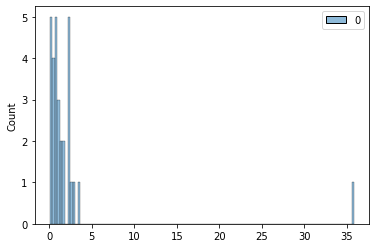

In [253]:
sns.histplot(y, bins = 120)

##Model Building

In [254]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [255]:
#Fitting to Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=200, random_state=42)

In [256]:
#Prediction
predictions_regressor = regressor.predict(x_test)
predictions_regressor

array([2.313769 , 1.2440075, 3.1846495, 2.270871 , 1.446322 , 9.7065375,
       2.5426275, 1.503941 , 1.640381 ])

Text(0, 0.5, 'predictions_regressor')

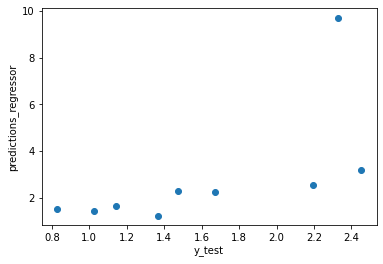

In [257]:
#Performance Evaluation
plt.scatter(y_test, predictions_regressor)
plt.xlabel("y_test")
plt.ylabel("predictions_regressor")

In [259]:
metrics.mean_absolute_error(y_test, predictions_regressor)

1.289976777777779

In [ ]:
#Inferences
'''

The model is not very accurate. There is a strange outlier within our prediction that is extremely off. This is likely due to the
limited amount of training data. There are only 30 values total, and 20 are used for training. Among these is one huge outlier
value, with a power index of 35, while the rest are all under 5 (most are even less than 2). Random Forest Regression was used 
because the set of features and data did not fit the assumptions and capabilities of Linear Regression. This model could be improved
by having access to the complete dataset and by using techniques to reduce the bias. Additionally, more EDA could be conducted to
see the relationship between the independent and dependent variables. 

'''